# Star Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. Star Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by Star Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:


# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
# Loading the dataset file.
data = pd.read_csv("StarHotelsGroup.csv")

## Data Overview

- Observations
- Sanity checks

In [6]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,3,0,0,3,Not Selected,0,Room_Type 1,277,2019,7,13,Online,0,0,0,89.10,2,Canceled


In [7]:
data.tail()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
56921,2,1,0,1,Meal Plan 2,0,Room_Type 4,45,2019,6,15,Online,0,0,0,163.88,1,Not_Canceled
56922,2,0,1,1,Meal Plan 1,0,Room_Type 1,320,2019,5,15,Offline,0,0,0,90.00,1,Canceled
56923,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
56924,2,0,2,2,Not Selected,0,Room_Type 1,6,2019,4,28,Online,0,0,0,162.50,2,Not_Canceled
56925,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [8]:
data.shape

(56926, 18)

* The data set contains 56,926 rows and 18 columns.

In [9]:
#check for duplicates
data[data.duplicated()].count()

no_of_adults                            14350
no_of_children                          14350
no_of_weekend_nights                    14350
no_of_week_nights                       14350
type_of_meal_plan                       14350
required_car_parking_space              14350
room_type_reserved                      14350
lead_time                               14350
arrival_year                            14350
arrival_month                           14350
arrival_date                            14350
market_segment_type                     14350
repeated_guest                          14350
no_of_previous_cancellations            14350
no_of_previous_bookings_not_canceled    14350
avg_price_per_room                      14350
no_of_special_requests                  14350
booking_status                          14350
dtype: int64

* There are 14,350 duplicates in our dataset.

In [10]:
#Dropping duplicate values
data.drop_duplicates(inplace=True)

In [11]:
#Checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          42576 non-null  int64  
 1   no_of_children                        42576 non-null  int64  
 2   no_of_weekend_nights                  42576 non-null  int64  
 3   no_of_week_nights                     42576 non-null  int64  
 4   type_of_meal_plan                     42576 non-null  object 
 5   required_car_parking_space            42576 non-null  int64  
 6   room_type_reserved                    42576 non-null  object 
 7   lead_time                             42576 non-null  int64  
 8   arrival_year                          42576 non-null  int64  
 9   arrival_month                         42576 non-null  int64  
 10  arrival_date                          42576 non-null  int64  
 11  market_segment_

* There are 3 different data tyoes: object, float64 and int64. The mojority of our values/columns are of data type int64 or numerical. 
* booking status, market_segment_type, room_type_reserved and type_of_meal_plan are Object data type.

In [12]:
#Check for missing values
data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

* There are no missing values

In [13]:
# Data description
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,42576.0,1.916737,0.527524,0.0,2.0,2.0,2.0,4.0
no_of_children,42576.0,0.142146,0.459920,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,42576.0,0.895270,0.887864,0.0,0.0,1.0,2.0,8.0
no_of_week_nights,42576.0,2.321167,1.519328,0.0,1.0,2.0,3.0,17.0
required_car_parking_space,42576.0,0.034362,0.182160,0.0,0.0,0.0,0.0,1.0
lead_time,42576.0,77.315953,77.279616,0.0,16.0,53.0,118.0,521.0
arrival_year,42576.0,2018.297891,0.626126,2017.0,2018.0,2018.0,2019.0,2019.0
arrival_month,42576.0,6.365488,3.051924,1.0,4.0,6.0,9.0,12.0
arrival_date,42576.0,15.682873,8.813991,1.0,8.0,16.0,23.0,31.0
repeated_guest,42576.0,0.030886,0.173011,0.0,0.0,0.0,0.0,1.0


* Average price per room mean seems to be around $112
* The majority of guest seem to be adults
* 2018 seems to be the year with the most guests arrivals
* The numbers for repeated guests are really low

In [14]:
data.describe(include=["object"])

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,42576,42576,42576,42576
unique,4,7,5,2
top,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,31863,29730,34169,28089


In [15]:
cat_columns = ["type_of_meal_plan", "room_type_reserved", "market_segment_type", "booking_status"]
for i in cat_columns:
    print(data[i].value_counts())
    print("*" * 50)

Meal Plan 1     31863
Not Selected     8716
Meal Plan 2      1989
Meal Plan 3         8
Name: type_of_meal_plan, dtype: int64
**************************************************
Room_Type 1    29730
Room_Type 4     9369
Room_Type 6     1540
Room_Type 5      906
Room_Type 2      718
Room_Type 7      307
Room_Type 3        6
Name: room_type_reserved, dtype: int64
**************************************************
Online           34169
Offline           5777
Corporate         1939
Complementary      496
Aviation           195
Name: market_segment_type, dtype: int64
**************************************************
Not_Canceled    28089
Canceled        14487
Name: booking_status, dtype: int64
**************************************************


* Most customers choose Room_type 1 and Meal plan 1. 
* The majority of customers make their reservations online. 

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [16]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

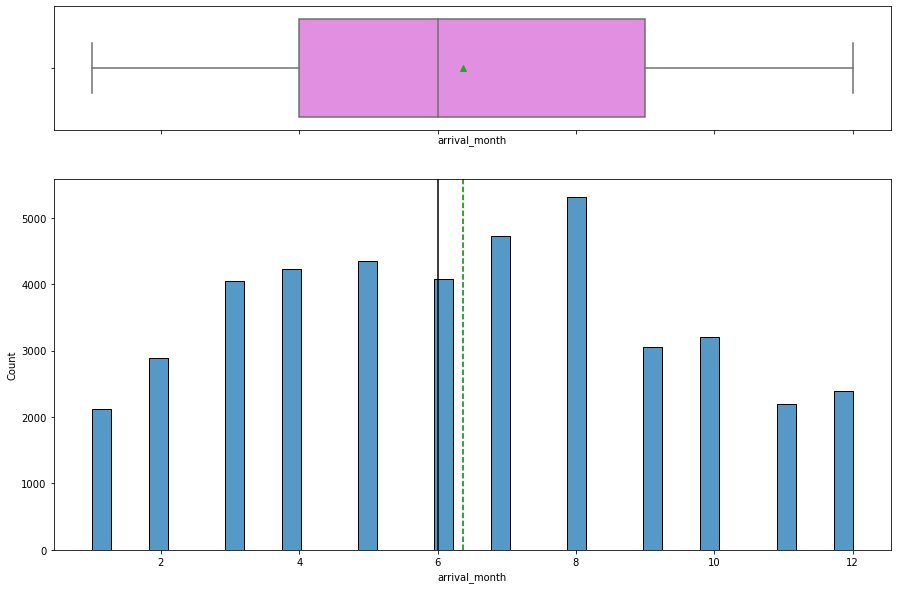

In [17]:
#Univariate analysis
histogram_boxplot(data, "arrival_month", bins=40)

In [18]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
no_of_adults,42576.0,1.916737,0.527524,0.0,2.0,2.0,2.0,4.0
no_of_children,42576.0,0.142146,0.459920,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,42576.0,0.895270,0.887864,0.0,0.0,1.0,2.0,8.0
no_of_week_nights,42576.0,2.321167,1.519328,0.0,1.0,2.0,3.0,17.0
required_car_parking_space,42576.0,0.034362,0.182160,0.0,0.0,0.0,0.0,1.0
lead_time,42576.0,77.315953,77.279616,0.0,16.0,53.0,118.0,521.0
arrival_year,42576.0,2018.297891,0.626126,2017.0,2018.0,2018.0,2019.0,2019.0
arrival_month,42576.0,6.365488,3.051924,1.0,4.0,6.0,9.0,12.0
arrival_date,42576.0,15.682873,8.813991,1.0,8.0,16.0,23.0,31.0
repeated_guest,42576.0,0.030886,0.173011,0.0,0.0,0.0,0.0,1.0


The average month of arrival of the Stars Hotel customers is June.

In [19]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

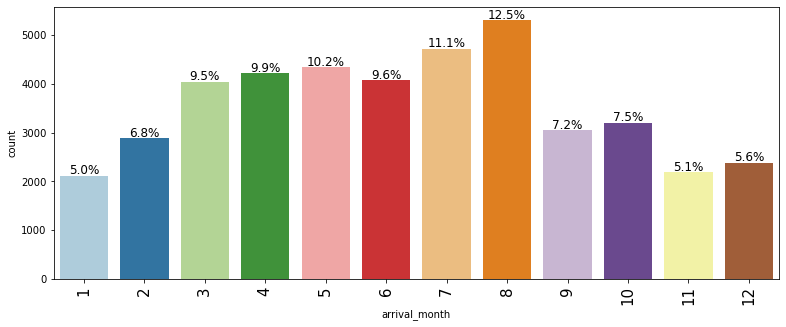

In [20]:
labeled_barplot(data, "arrival_month", perc=True)

**August and July are the busiest, followed by May and June.**

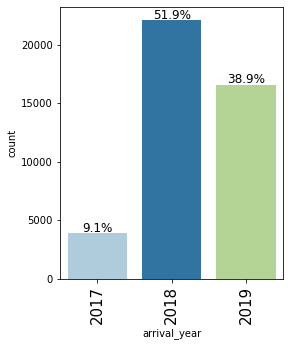

In [21]:
labeled_barplot(data, "arrival_year", perc=True)

**2018 is the arrival year with the highest numbers of arrivals.**

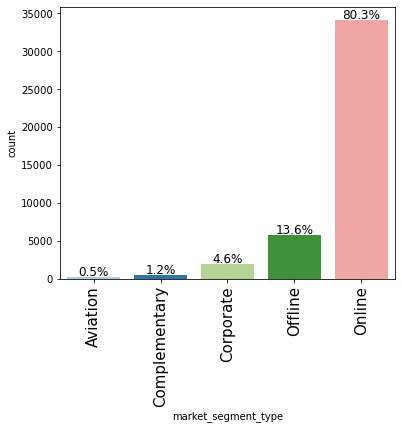

In [22]:
labeled_barplot(data, "market_segment_type", perc=True)

* Only 3.1% of guests came back and stayed at Stars Hotel.

**Most guest come from the online market segment.**

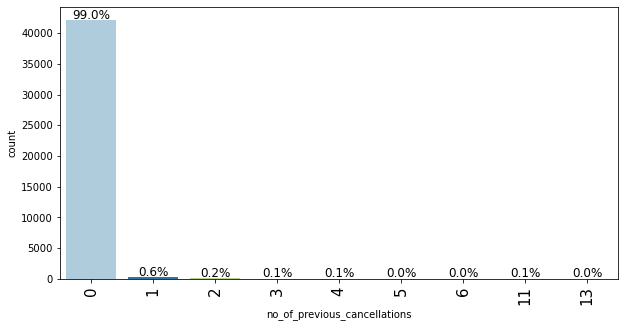

In [23]:
labeled_barplot(data, "no_of_previous_cancellations", perc=True)

**0.6% of customers cancelled prior to current booking**

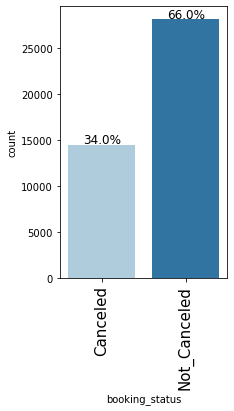

In [24]:
labeled_barplot(data, "booking_status", perc=True)

**34% of bookings got cancelled**

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          42576 non-null  int64  
 1   no_of_children                        42576 non-null  int64  
 2   no_of_weekend_nights                  42576 non-null  int64  
 3   no_of_week_nights                     42576 non-null  int64  
 4   type_of_meal_plan                     42576 non-null  object 
 5   required_car_parking_space            42576 non-null  int64  
 6   room_type_reserved                    42576 non-null  object 
 7   lead_time                             42576 non-null  int64  
 8   arrival_year                          42576 non-null  int64  
 9   arrival_month                         42576 non-null  int64  
 10  arrival_date                          42576 non-null  int64  
 11  market_segment_

* Only 3.1% of guests came back and stayed at Stars Hotel.

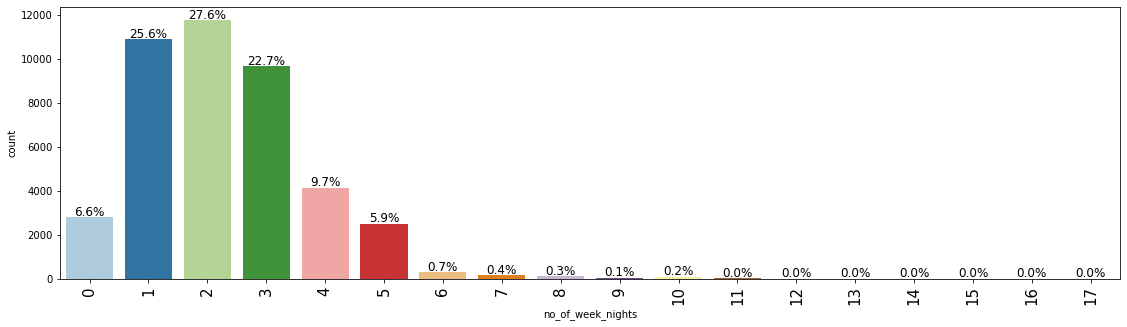

In [26]:
labeled_barplot(data, "no_of_week_nights", perc=True)

* Guest who stay during week nights tend to book 1 to 3 week nights for a 75% of  week nights bookings.

Questions:

* What are the busiest months in the hotel?
**August and July are the busiest, followed by May and June.**
* Which market segment do most of the guests come from? Most guest come from the online market segment.
* Hotel rates are dynamic and change according to demand and customer demographics. What are the     differences in room prices in different market segments?
* What percentage of bookings are canceled?
* Repeating guests are the guests who stay in the hotel often and are important to brand             equity. What percentage of repeating guests cancel?
* Many guests have special requirements when booking a hotel room. Do these requirements affect     booking cancellation?

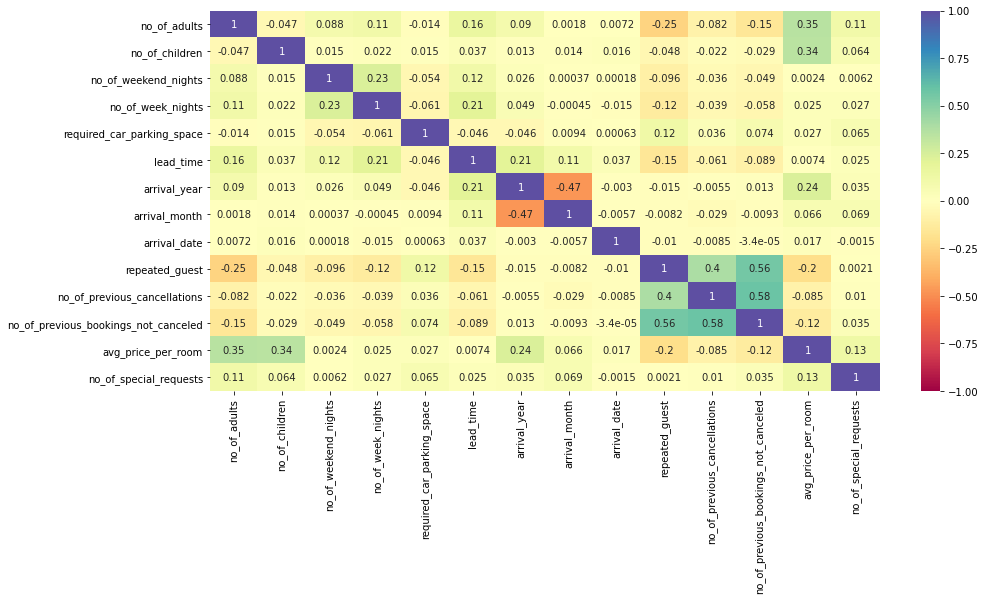

In [27]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

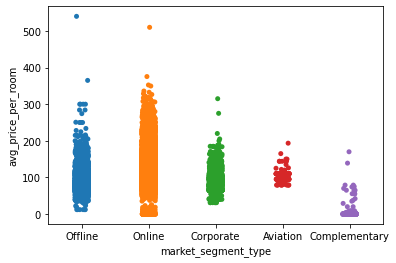

In [28]:
sns.stripplot(data['market_segment_type'], data['avg_price_per_room'])
plt.show()

In [29]:
datagroup = data.groupby("market_segment_type").avg_price_per_room.mean()
Marketprice = pd.DataFrame({'market_segment_type':datagroup.index, 'avg_price_per_room':datagroup.values})

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          42576 non-null  int64  
 1   no_of_children                        42576 non-null  int64  
 2   no_of_weekend_nights                  42576 non-null  int64  
 3   no_of_week_nights                     42576 non-null  int64  
 4   type_of_meal_plan                     42576 non-null  object 
 5   required_car_parking_space            42576 non-null  int64  
 6   room_type_reserved                    42576 non-null  object 
 7   lead_time                             42576 non-null  int64  
 8   arrival_year                          42576 non-null  int64  
 9   arrival_month                         42576 non-null  int64  
 10  arrival_date                          42576 non-null  int64  
 11  market_segment_

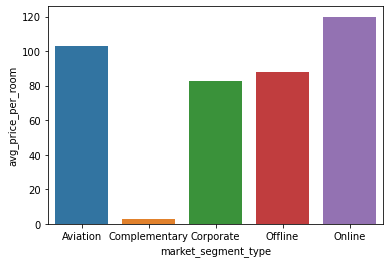

In [31]:
sns.barplot(x ="market_segment_type",y = "avg_price_per_room", data = Marketprice)
plt.show()


* The average price per room for Online bookings seems to be the highest. 

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          42576 non-null  int64  
 1   no_of_children                        42576 non-null  int64  
 2   no_of_weekend_nights                  42576 non-null  int64  
 3   no_of_week_nights                     42576 non-null  int64  
 4   type_of_meal_plan                     42576 non-null  object 
 5   required_car_parking_space            42576 non-null  int64  
 6   room_type_reserved                    42576 non-null  object 
 7   lead_time                             42576 non-null  int64  
 8   arrival_year                          42576 non-null  int64  
 9   arrival_month                         42576 non-null  int64  
 10  arrival_date                          42576 non-null  int64  
 11  market_segment_

In [33]:
#coverting data type object to categorical
data["booking_status"] = data["booking_status"].astype("category")
data["market_segment_type"] = data["market_segment_type"].astype("category")
data["type_of_meal_plan"] = data["type_of_meal_plan"].astype("category")
data["room_type_reserved"] = data["room_type_reserved"].astype("category")

In [34]:
catfeatures = ["booking_status","market_segment_type","type_of_meal_plan", "room_type_reserved"]
numeric_columns = [feature for feature in data.columns if feature not in catfeatures]

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          42576 non-null  int64   
 1   no_of_children                        42576 non-null  int64   
 2   no_of_weekend_nights                  42576 non-null  int64   
 3   no_of_week_nights                     42576 non-null  int64   
 4   type_of_meal_plan                     42576 non-null  category
 5   required_car_parking_space            42576 non-null  int64   
 6   room_type_reserved                    42576 non-null  category
 7   lead_time                             42576 non-null  int64   
 8   arrival_year                          42576 non-null  int64   
 9   arrival_month                         42576 non-null  int64   
 10  arrival_date                          42576 non-null  int64   
 11  ma

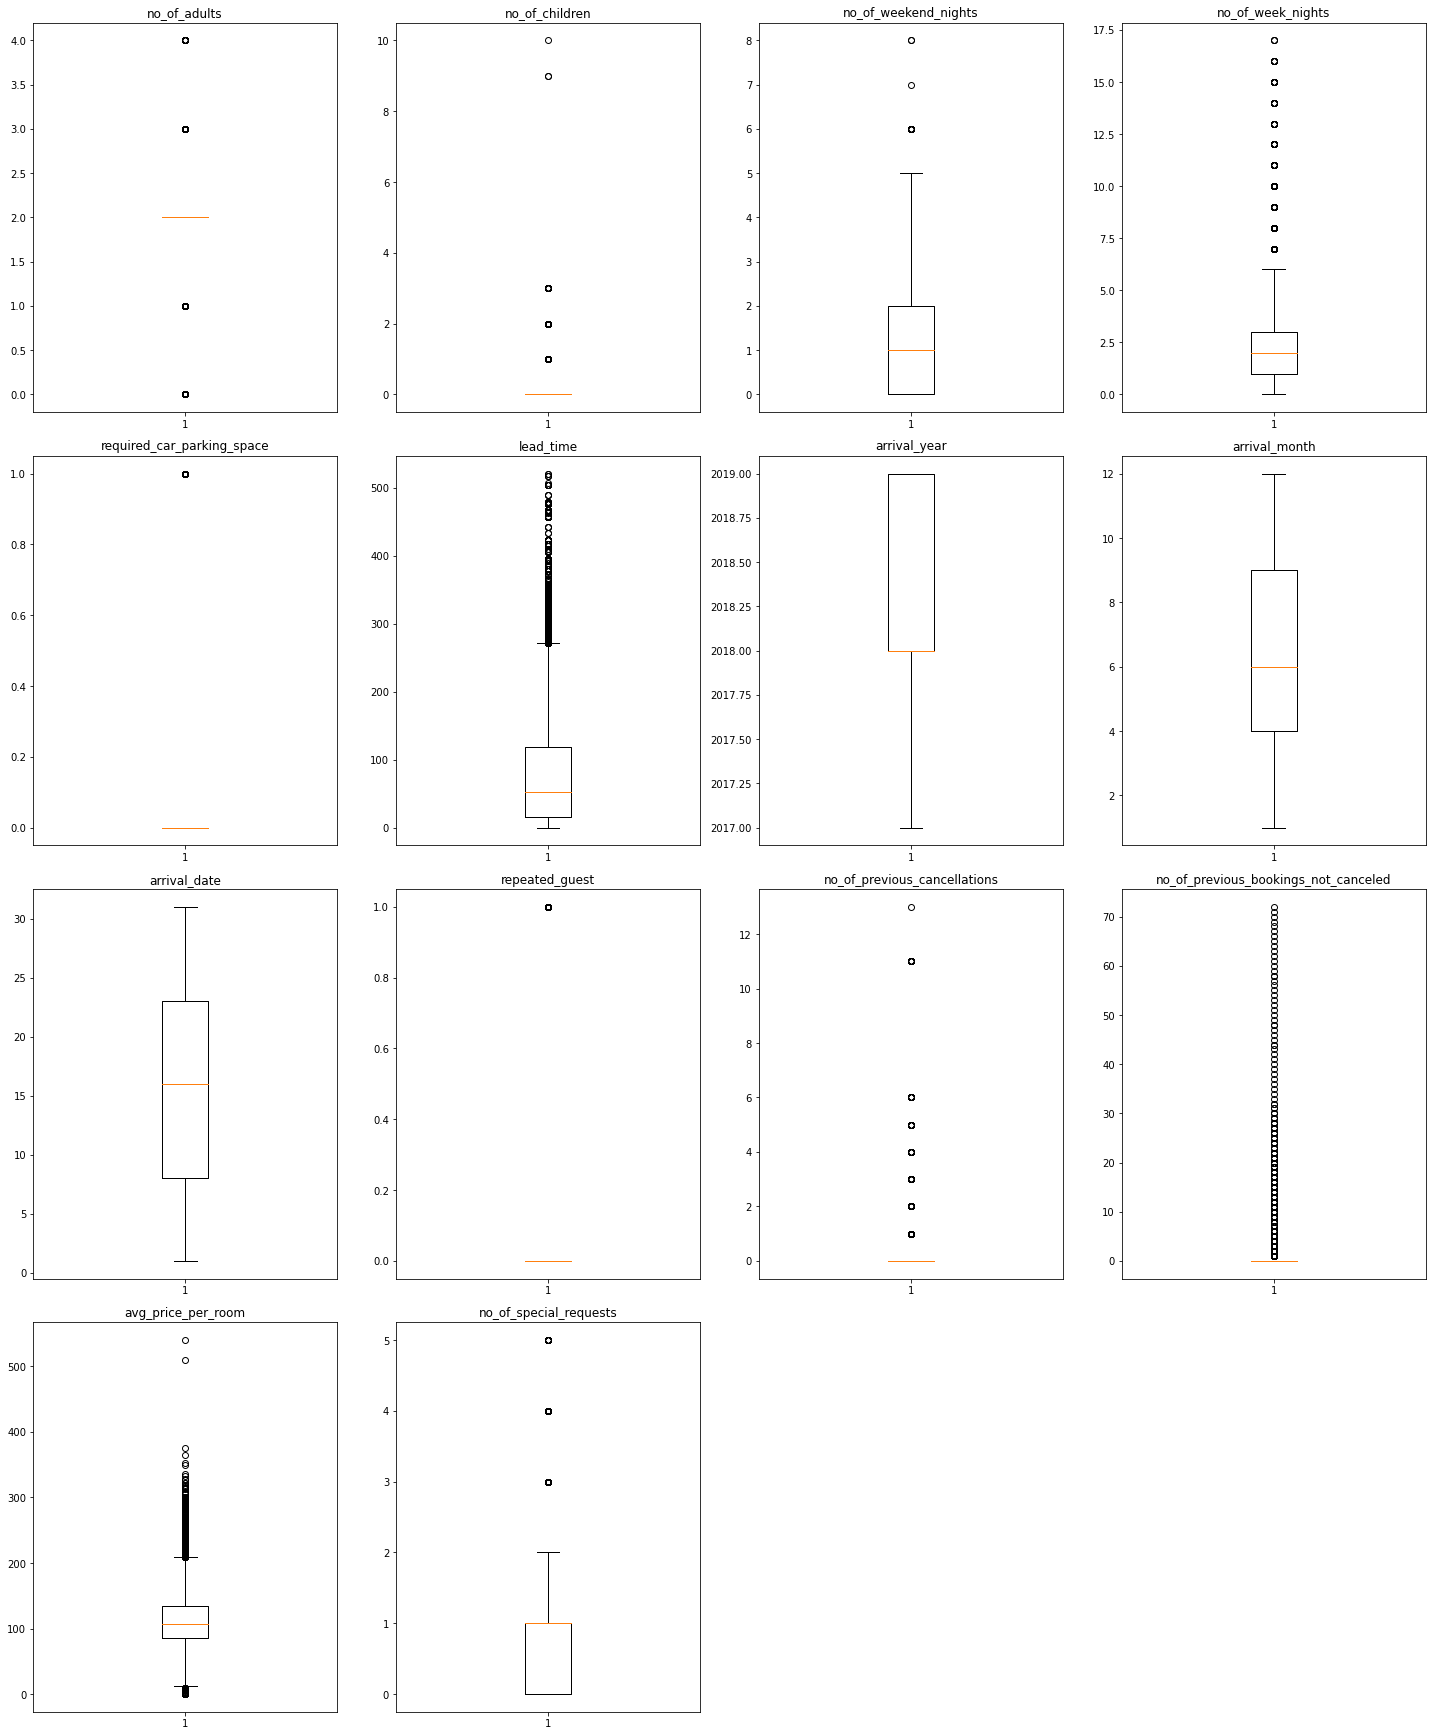

In [36]:
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [37]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<AxesSubplot:xlabel='avg_price_per_room', ylabel='booking_status'>

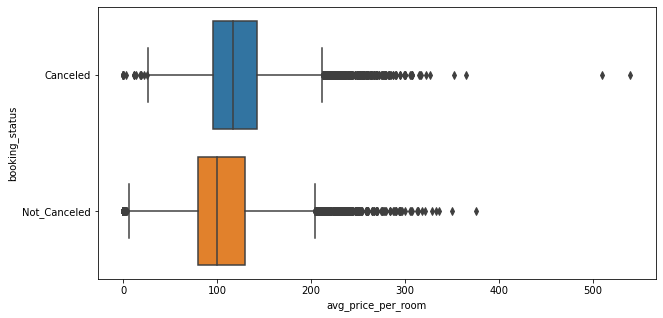

In [38]:
plt.figure(figsize=(10, 5))
sns.boxplot(data["avg_price_per_room"], data["booking_status"])


labeled_barplot(data, "", perc=True)

In [39]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,3,0,0,3,Not Selected,0,Room_Type 1,277,2019,7,13,Online,0,0,0,89.10,2,Canceled


In [40]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [41]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,3,0,0,3,Not Selected,0,Room_Type 1,277,2019,7,13,Online,0,0,0,89.10,2,Canceled


## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [43]:
checking_vif(data.drop(["type_of_meal_plan", "room_type_reserved", "market_segment_type", "booking_status"], 1))

,feature,VIF
0,no_of_adults,18.216279
1,no_of_children,1.301258
2,no_of_weekend_nights,2.162324
3,no_of_week_nights,3.703983
4,required_car_parking_space,1.062375
5,lead_time,2.214606
6,arrival_year,27.499693
7,arrival_month,5.473227
8,arrival_date,4.176621
9,repeated_guest,1.637942


In [44]:
checking_vif(data.drop(["type_of_meal_plan", "room_type_reserved", "arrival_year", "market_segment_type", "booking_status"], 1))

,feature,VIF
0,no_of_adults,13.171615
1,no_of_children,1.299578
2,no_of_weekend_nights,2.136909
3,no_of_week_nights,3.537155
4,required_car_parking_space,1.062153
5,lead_time,2.212776
6,arrival_month,4.731016
7,arrival_date,3.703243
8,repeated_guest,1.551020
9,no_of_previous_cancellations,1.542245


In [45]:
checking_vif(data.drop(["type_of_meal_plan", "room_type_reserved", "arrival_year", "market_segment_type", "no_of_adults",  "booking_status"], 1))

,feature,VIF
0,no_of_children,1.210452
1,no_of_weekend_nights,2.100078
2,no_of_week_nights,3.393645
3,required_car_parking_space,1.061891
4,lead_time,2.145140
5,arrival_month,4.560774
6,arrival_date,3.524287
7,repeated_guest,1.550767
8,no_of_previous_cancellations,1.540620
9,no_of_previous_bookings_not_canceled,1.890452


In [46]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
no_of_adults,42576,NaN,NaN,NaN,1.91674,0.527524,0,2,2,2,4
no_of_children,42576,NaN,NaN,NaN,0.142146,0.45992,0,0,0,0,10
no_of_weekend_nights,42576,NaN,NaN,NaN,0.89527,0.887864,0,0,1,2,8
no_of_week_nights,42576,NaN,NaN,NaN,2.32117,1.51933,0,1,2,3,17
type_of_meal_plan,42576,4,Meal Plan 1,31863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,42576,NaN,NaN,NaN,0.0343621,0.18216,0,0,0,0,1
room_type_reserved,42576,7,Room_Type 1,29730,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,42576,NaN,NaN,NaN,77.316,77.2796,0,16,53,118,521
arrival_year,42576,NaN,NaN,NaN,2018.3,0.626126,2017,2018,2018,2019,2019
arrival_month,42576,NaN,NaN,NaN,6.36549,3.05192,1,4,6,9,12


In [50]:
#X = data.drop(["avg_price_per_room","type_of_meal_plan", "room_type_reserved", "arrival_year", "market_segment_type", "no_of_adults",  "booking_status" ], axis=1)
#y = data["avg_price_per_room"]

In [51]:
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
X.head()

NameError: name 'X' is not defined

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

NameError: name 'x' is not defined

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          42576 non-null  int64   
 1   no_of_children                        42576 non-null  int64   
 2   no_of_weekend_nights                  42576 non-null  int64   
 3   no_of_week_nights                     42576 non-null  int64   
 4   type_of_meal_plan                     42576 non-null  category
 5   required_car_parking_space            42576 non-null  int64   
 6   room_type_reserved                    42576 non-null  category
 7   lead_time                             42576 non-null  int64   
 8   arrival_year                          42576 non-null  int64   
 9   arrival_month                         42576 non-null  int64   
 10  arrival_date                          42576 non-null  int64   
 11  ma

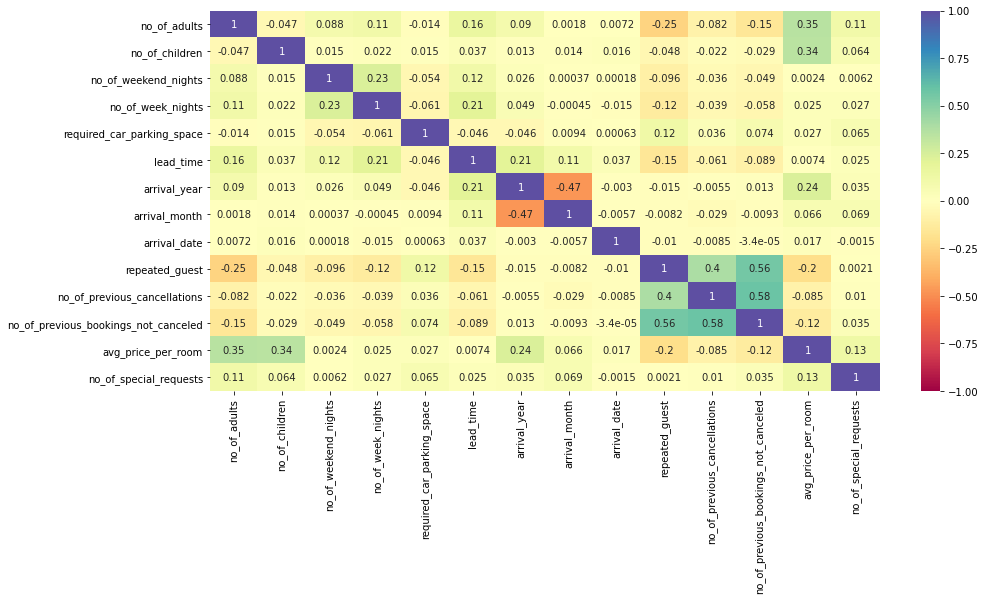

In [55]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

In [56]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [57]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,3,0,0,3,Not Selected,0,Room_Type 1,277,2019,7,13,Online,0,0,0,89.10,2,Canceled


In [122]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab
    tab1 = pd.crosstab(x, data["booking_status"], margins=True).sort_values(
        by="1", ascending=False
    )
    print(tab1)
    print("-" * 120)
    ## visualising the cross tab
    tab = pd.crosstab(x, data["booking_status"], normalize="index").sort_values(
        by=" 0", ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(17, 7))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


In [123]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

booking_status           0    All
market_segment_type              
All                  42576  42576
Online               34169  34169
Offline               5777   5777
Corporate             1939   1939
Complementary          496    496
Aviation               195    195
------------------------------------------------------------------------------------------------------------------------


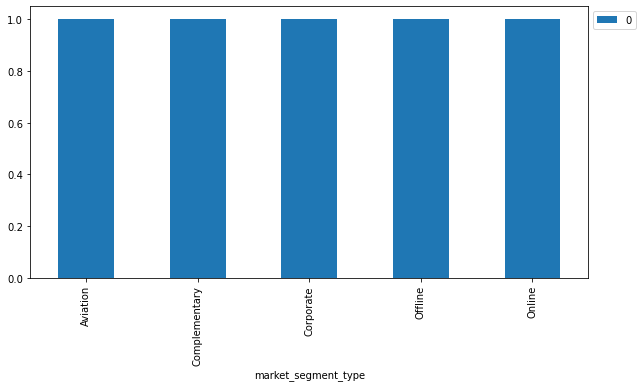

In [124]:
stacked_barplot(data, "market_segment_type", "booking_status")

## Building a Logistic Regression model

In [59]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

In [60]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [61]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


In [62]:
#X = data.drop("booking_status", axis=1)
#Y = data["booking_status"]

# creating dummy variables
#X = pd.get_dummies(X, drop_first=True)

# splitting in training and test set
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          42576 non-null  int64   
 1   no_of_children                        42576 non-null  int64   
 2   no_of_weekend_nights                  42576 non-null  int64   
 3   no_of_week_nights                     42576 non-null  int64   
 4   type_of_meal_plan                     42576 non-null  category
 5   required_car_parking_space            42576 non-null  int64   
 6   room_type_reserved                    42576 non-null  category
 7   lead_time                             42576 non-null  int64   
 8   arrival_year                          42576 non-null  int64   
 9   arrival_month                         42576 non-null  int64   
 10  arrival_date                          42576 non-null  int64   
 11  ma

In [105]:
data["booking_status"] = data["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

In [106]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [66]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (29803, 27)
Shape of test set :  (12773, 27)
Percentage of classes in training set:
0    0.661074
1    0.338926
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.656619
1    0.343381
Name: booking_status, dtype: float64


In [67]:
# import warnings

# warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

In [102]:
# Simple example for beginers how to adress ""
import numpy as np
from sklearn                        import metrics, svm
from sklearn.linear_model           import LinearRegression
from sklearn import preprocessing
from sklearn import utils

In [103]:
print(y_train)

52247    0
8414     0
44196    1
28535    0
18280    0
        ..
9003     0
42111    1
5815     1
14360    1
42831    0
Name: booking_status, Length: 29803, dtype: category
Categories (2, int64): [1, 0]


In [104]:
data_one = pd.get_dummies(data["booking_status"])
print(data_one)

       1  0
0      0  1
1      0  1
2      1  0
3      1  0
4      1  0
...   .. ..
56920  0  1
56921  0  1
56922  1  0
56923  1  0
56924  0  1

[42576 rows x 2 columns]


In [71]:
print(y_train)

52247    0
8414     0
44196    1
28535    0
18280    0
        ..
9003     0
42111    1
5815     1
14360    1
42831    0
Name: booking_status, Length: 29803, dtype: category
Categories (2, int64): [1, 0]


In [72]:
#** Note: If is binary data you can use this type of regression.** There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

model = LinearRegression()
lg = model.fit(X_train, y_train)

In [73]:
# predicting on training set
y_pred_train = lg.predict(X_train)

In [74]:
print(y_pred_train)

[0.18278694 0.08825435 0.71171396 ... 0.33758351 0.60612551 0.33473882]


In [75]:
model.fit

<bound method LinearRegression.fit of LinearRegression()>

## Model performance evaluation

In [90]:
from sklearn.metrics import mean_squared_error, r2_score
import math

In [91]:
mean_squared_error(y_pred_train, y_train)


0.1465065879005713

In [92]:
math.sqrt(mean_squared_error(y_pred_train, y_train))

0.3827617900216417

In [93]:
r2_score(y_pred_train, y_train)
#proportion of variability of your target 

-0.8892264298996881

In [94]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

datanew = sm.add_constant(X_train)
est = sm.OLS(y_train, datanew)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         booking_status   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     583.7
Date:                Sat, 18 Sep 2021   Prob (F-statistic):               0.00
Time:                        00:13:11   Log-Likelihood:                -13668.
No. Observations:               29803   AIC:                         2.739e+04
Df Residuals:                   29775   BIC:                         2.762e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [95]:
x_train2 = X_train.copy()

In [96]:
x_train2 = x_train2.drop(["no_of_previous_cancellations"], axis=1)

In [97]:
datanew = sm.add_constant(x_train2)
est = sm.OLS(y_train, datanew)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         booking_status   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     606.1
Date:                Sat, 18 Sep 2021   Prob (F-statistic):               0.00
Time:                        00:13:12   Log-Likelihood:                -13669.
No. Observations:               29803   AIC:                         2.739e+04
Df Residuals:                   29776   BIC:                         2.762e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [98]:
r2_score(y_pred_train, y_train)
#proportion of variability of your target 

-0.8892264298996881

In [99]:

model = LinearRegression()
lg = model.fit(x_train2, y_train)

In [100]:
y_pred_train2 = lg.predict(x_train2)

In [101]:
r2_score(y_pred_train2, y_train)
#proportion of variability of your target 

-0.8896087163202382

In [111]:
data["booking_status"] = data["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

In [113]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [114]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (29803, 27)
Shape of test set :  (12773, 27)
Percentage of classes in training set:
0    1.0
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    1.0
Name: booking_status, dtype: float64


## Final Model Summary

## Building a Decision Tree model

## Do we need to prune the tree?

## Model Performance Comparison and Conclusions

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?